In [1]:
erroneous_addresses = open('data/erroneous_addresses.txt', 'r')
erroneous_address_list = []

for line in erroneous_addresses:
    addr, line_no_str = line.strip().split(',')
    erroneous_address_list.append((addr, int(line_no_str.strip())))

erroneous_addresses.close()

In [32]:
from random import sample 
from app.text_matcher import TextAddress

soundex_weight = 0.2

data = []

input_addresses = sample(erroneous_address_list, 500)

for soundex_weight in [0.1, 0.2, 0.3, 0.4]:

    correct = 0
    incorrect = 0
    accuracy = 0

    text_score_data = []
    soundex_score_data = []
    color = []

    for input_line, input_line_no in input_addresses:
        max_text_score = 0
        max_soundex_score = 0
        output_line_no = 0

        curr_line_no = 1
        with open('data/addresses.txt', 'r') as addresses:
            for line in addresses:
                addr = TextAddress(line.strip())
                input_address = TextAddress(input_line.strip())
                text_score = input_address.compare_text(addr)
                soundex_score = input_address.compare_sound(addr)  

                text_score_data.append(text_score)
                soundex_score_data.append(soundex_score)
                color.append('blue')

                composite_score = (1 - soundex_weight)*text_score + soundex_weight*soundex_score
                if composite_score > (1 - soundex_weight)*max_text_score + soundex_weight*max_soundex_score:
                    max_text_score = text_score
                    max_soundex_score = soundex_score
                    output_line_no = curr_line_no
                curr_line_no += 1
        
        if output_line_no == input_line_no:
            correct += 1    
            text_score_data.append(max_text_score)
            soundex_score_data.append(max_soundex_score)
            color.append('green')
        else:
            incorrect += 1
            text_score_data.append(max_text_score)
            soundex_score_data.append(max_soundex_score)
            color.append('red')


    accuracy = (correct/(correct+incorrect))
    data.append([text_score_data, soundex_score_data, color, accuracy])

Max Soundex Multiplier:  4.83
Average Soundex Multiplier:  1.42


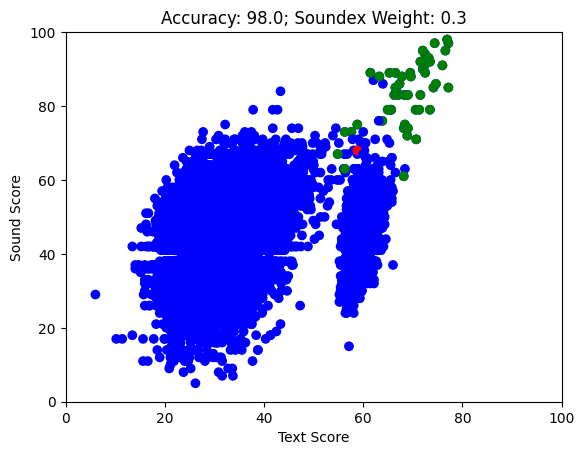

In [31]:
import matplotlib.pyplot as plt
from statistics import mean, stdev

i = 0
soundex_weight = round(0.1 * (i+1), 1)
text_score_data = data[i][0]
soundex_score_data = data[i][1]
color_data = data[i][2]
accuracy = data[i][3]

multipliers = [(soundex_score/text_score) if soundex_score > 0 else 0 for text_score, soundex_score in zip(text_score_data, soundex_score_data)]

print("Mean Multiplier: ", round(mean(multipliers), 2))
print("Standard Deviation in Multiplier: ", round(stdev(multipliers), 2))


plt.scatter(x=text_score_data, y=soundex_score_data, marker='o', color=color_data)
plt.title(f'Accuracy: {100 * accuracy}; Soundex Weight: {soundex_weight}')
plt.xlabel('Text Score')
plt.ylabel('Sound Score')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

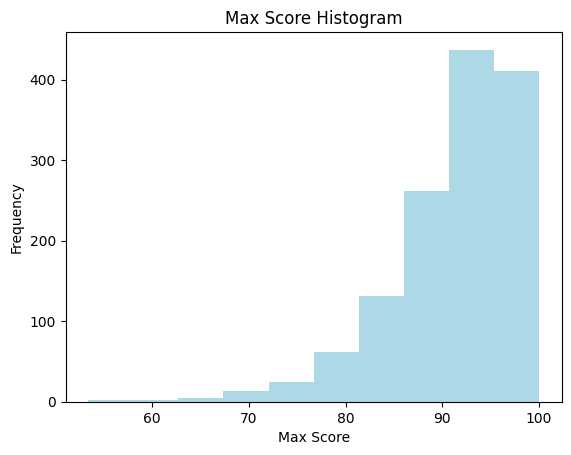

In [6]:
top_score_data = []
for i in range(len(text_score_data)):
    if correctness_data[i]:
        top_score_data.append((1 - soundex_weight)*text_score_data[i] + soundex_weight*soundex_score_data[i])

plt.hist(top_score_data, bins=10, color='lightblue')
 
# Adding labels and title
plt.xlabel('Max Score')
plt.ylabel('Frequency')
plt.title('Max Score Histogram')
 
# Display the plot
plt.show()